# A Troca de Cartas 

### **O Cenário**
Você está em uma rodada decisiva de um jogo de cartas e precisa desesperadamente trocar a carta da sua mão pela carta do topo do baralho. A situação atual é:

* **Sua Mão ($q_0$):** Você segura um **7 de Espadas** ($\spadesuit$). Vamos representar este naipe "indesejado" como o estado **$|0\rangle$**.
* **O Baralho ($q_1$):** Você sabe que a carta no topo do baralho é um **7 de Ouros** ($\diamondsuit$). Vamos representar este naipe "vencedor" como o estado **$|1\rangle$**.

### **A Regra do Universo (Lei da Conservação)**
Para ganhar, você precisa transmutar a sua carta em Ouros. No entanto, as regras do jogo exigem consistência: **não podem existir dois 7 de Ouros no jogo ao mesmo tempo.**

Você deve criar um algoritmo quântico que tente transformar sua carta, mas que garanta a seguinte lógica condicional:

> *"Se a carta na minha mão virar Ouros ($1$), a carta do baralho deve, instantaneamente, virar Espadas ($0$)."*

### **O Desafio**
Modele este sistema usando **2 Qubits** e construa um circuito que maximize suas chances de sucesso (obter o estado $|01\rangle$), partindo do estado inicial desfavorável ($|10\rangle$).



In [98]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [99]:
simulador = AerSimulator()

### Estado Inicial:
Começamos com Ouros no Baralho ($1$) e Espadas na Mão ($0$).
$$|\psi_0\rangle = |10\rangle = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$

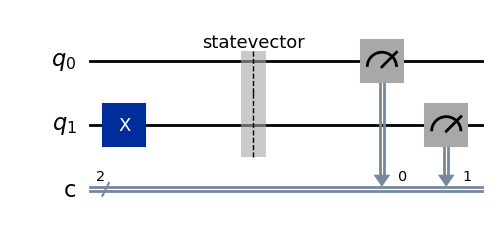

In [100]:
qc_7espada = QuantumCircuit(2, 2)

qc_7espada.x(1)

qc_7espada.save_statevector()

qc_7espada.measure(0, 0)
qc_7espada.measure(1, 1)

qc_7espada.draw('mpl')

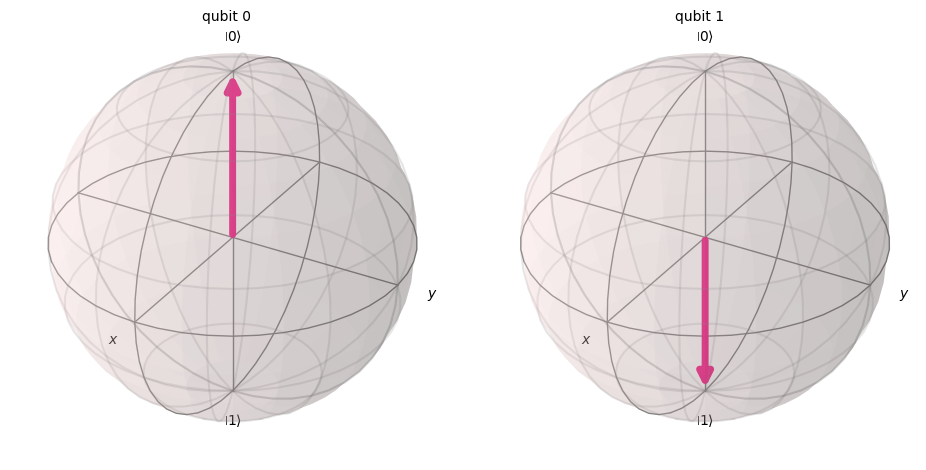

In [101]:
job_7espada = simulador.run(qc_7espada)
result_7espada = job_7espada.result()

state_7espada = result_7espada.data()['statevector']
    
display(plot_bloch_multivector(state_7espada))

## Rotação $RY$ em $q_0$:

Aplicamos uma rotação forte no qubit da mão para tentar transformá-lo em 1.
Lembrando que $RY(\theta)|0\rangle = \cos(\frac{\theta}{2})|0\rangle + \sin(\frac{\theta}{2})|1\rangle$.

Aplicando isso ao nosso sistema (onde $q_1$ permanece $|1\rangle$):
$$|\psi_1\rangle = |1\rangle \otimes RY(\theta)|0\rangle$$
$$|\psi_1\rangle = |1\rangle \otimes \left( \cos\frac{\theta}{2}|0\rangle + \sin\frac{\theta}{2}|1\rangle \right)$$
$$|\psi_1\rangle = \cos\frac{\theta}{2}|10\rangle + \sin\frac{\theta}{2}|11\rangle$$

> **Problema:** Note o termo **$|11\rangle$**. Isso significa "Mão com Ouros E Baralho com Ouros". Isso viola a regra do jogo!

## A Correção (CNOT $q_0 \to q_1$):
A porta CNOT usa a Mão ($q_0$, bit da direita) para controlar o Baralho ($q_1$, bit da esquerda).
* **Regra:** Se o bit da direita for **1**, inverte o da esquerda.

Aplicando ao estado $|\psi_1\rangle$:
1.  Termo $\cos|10\rangle$: O controle ($q_0$) é **0**. Nada acontece. Continua $|10\rangle$.
2.  Termo $\sin|11\rangle$: O controle ($q_0$) é **1**. O alvo ($q_1$) inverte de $1 \to 0$. O estado vira **$|01\rangle$**.

$$|\psi_{final}\rangle = \sin(\frac{\theta}{2})|01\rangle + \cos(\frac{\theta}{2})|10\rangle$$

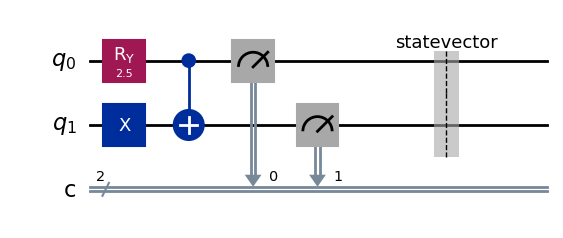

In [102]:
qc_7ouros = QuantumCircuit(2, 2)

qc_7ouros.x(1)
qc_7ouros.ry(2.5, 0)
qc_7ouros.cx(0, 1)

qc_7ouros.measure(0, 0)
qc_7ouros.measure(1, 1)


qc_7ouros.save_statevector()

qc_7ouros.draw('mpl')

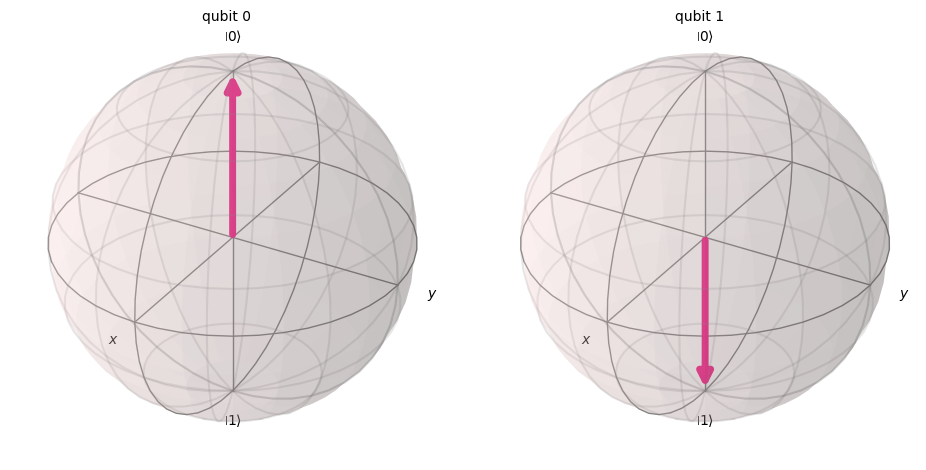

In [103]:
job_7ouros = simulador.run(qc_7ouros)
result_7ouros = job_7ouros.result()

state_7ouros = result_7ouros.data().get('statevector')

display(plot_bloch_multivector(state_7ouros))

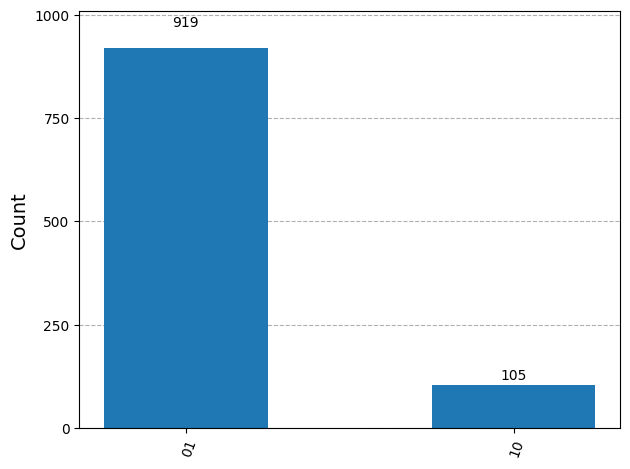

In [104]:
counts_7ouros = result_7ouros.get_counts()

display(plot_histogram(counts_7ouros))